In [15]:


#%%
import os
import sys
import json
from argparse import ArgumentParser
import yaml
import torch
import random
import numpy as np
from tqdm import tqdm
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from matplotlib import pyplot as plt
# personal files
import models
from datasets import MelDataset, vctkDataset, greatbirdDataset, finchbird2, western_bird


os.chdir('/mnt/work/')
# ------------------------------------------------------------------------
# # config loading
# data_config_path = "./Animal/configs/western_bird/dataset_western_bird_chunk.yaml"
# # model path
# model_config_path = "./Animal/configs/western_bird/model_western_bird.yaml"
# model_path = './Animal/output/western_bird'
# # model name
# ## embedding yes
# exp_name = 'VAEbase-western_bird_2-c_100.0_1.0-i_10.0_100.0'
# checkpoint = "190000.pth.tar"
# key_posi = [3, 9, 23, 25, 38, 40, 51, 73, 92, 93, 99, 109, 113, 125]
#------------------------------------------------------------------------
# # config loading
# data_config_path = "./Animal/configs/western_bird/dataset_western_bird_chunk.yaml"
# # model path
# model_config_path = "./Animal/configs/western_bird/model_western_bird.yaml"
# model_path = './Animal/output/western_bird'
# # model name
# ## embedding yes
# exp_name = 'VAEbase-western_bird_2-c_100.0_1.0-i_10.0_100.0'
# checkpoint = "190000.pth.tar"
# key_posi = [3, 9, 23, 25, 38, 40, 51, 73, 92, 93, 99, 109, 113, 125]
#------------------------------------------------------------------------
## config loading
# data_config_path = "./Animal/configs/western_bird/dataset_western_bird_chunk.yaml"
# # model path
# model_config_path = "./Animal/configs/western_bird/model_western_bird.yaml"
# model_path = './Animal/output/western_bird'
# # model name
# ## embedding yes
# exp_name = 'VAEbase-western_bird_3-c_100.0_0.75-i_10.0_100.0'
# checkpoint = "120000.pth.tar"
# key_posi = [3, 9, 23, 25, 38, 40, 51, 73, 92, 93, 99, 109, 113, 125]
#------------------------------------------------------------------------
# config loading
data_config_path = "./Animal/configs/western_bird/dataset_western_bird_chunk.yaml"
# model path
model_config_path = "./Animal/configs/western_bird/model_western_bird.yaml"
model_path = './Animal/output/western_bird'
# model name
## embedding yes
exp_name = 'VAEbase-western_bird_3-c_100.0_0.75-i_10.0_100.0'
checkpoint = "120000.pth.tar"
key_posi = [3, 9, 23, 25, 38, 40, 51, 73, 92, 93, 99, 109, 113, 125]



# device
torch.cuda.set_device(1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = "cpu"
# ------------------------------------------------------------------------

# dataset loading
dataset_config = yaml.load(open(data_config_path, "r"), Loader=yaml.FullLoader)
analy_set = western_bird(dataset_config, subset='test')


analy_loader = DataLoader(analy_set, batch_size=1, shuffle=False)

# model loading
model_config = yaml.load(open(model_config_path, "r"), Loader=yaml.FullLoader)
model_name = model_config['model_name']
model_type = getattr(models, model_name) # model choose
model = model_type(model_config, device).to(device) # model config load

#load model
save_path = os.path.join(model_path, exp_name, 'checkpoint', checkpoint)
ckpt = torch.load(save_path)
model.load_state_dict(ckpt["model"])
model.eval()

# data store
total_z_indi_mu = []
total_z_indi_log_std = []
total_z_indi = []

total_z_con_mu = []
total_z_con_log_std = []
total_z_con = []

total_x_gt = [] # mel
total_x_rec = [] # reconstuct mel
total_cID = []
total_ctID = []

total_key_indi_mu = []

for mel, lenx, indi_mel, _, cID_type in tqdm(analy_loader):
        mel = mel.to(device)
        lenx = lenx.to(device)
        indi_mel = indi_mel.to(device)
        
        outputs = model(mel, lenx, indi_mel) 
        
        z_indi_mu = outputs['indi_mu'].detach().cpu().numpy()
        z_indi_log_std = outputs['indi_log_std'].detach().cpu().numpy()
        z_indi = outputs['z_indi'].detach().cpu().numpy() 
                
        z_con_mu = outputs['con_mu'].detach().cpu().numpy() 
        z_con_log_std = outputs['con_log_std'].detach().cpu().numpy() 
        z_con = outputs['z_con'].detach().cpu().numpy() 
        x_rec = outputs['x_rec'].detach().cpu().numpy() 
        
        total_z_indi_mu.append(z_indi_mu)
        # extracte key position of total_z_indi_mu [:,11] 
        total_key_indi_mu.append([z_indi_mu[:,i] for i in key_posi])
        
        total_z_indi_log_std.append(z_indi_log_std)
        total_z_indi.append(z_indi)
        total_z_con_mu.append(z_con_mu)
        total_z_con_log_std.append(z_con_log_std)
        total_z_con.append(z_con)
        
        total_x_gt.append(mel.detach().cpu().numpy())
        total_x_rec.append(x_rec)
        
        # print('cID',cID[0][1:])
        total_ctID.append(cID_type[0])
        
        

times = 0

unique_elements, counts = np.unique(total_ctID, return_counts=True)
for element, count in zip(unique_elements, counts):
    times += 1
    print('cID_counts',f"{element}: {count}")
print('times',times)

dataset winterbird loading...


  0%|          | 0/3498 [00:00<?, ?it/s]

100%|██████████| 3498/3498 [02:07<00:00, 27.33it/s]

cID_counts Acrocephalus arundinaceus: 521
cID_counts Acrocephalus melanopogon: 512
cID_counts Acrocephalus scirpaceus: 597
cID_counts Alcedo atthis: 126
cID_counts Anas platyrhynchos: 62
cID_counts Anas strepera: 78
cID_counts Ardea purpurea: 51
cID_counts Botaurus stellaris: 127
cID_counts Charadrius alexandrinus: 75
cID_counts Ciconia ciconia: 128
cID_counts Circus aeruginosus: 74
cID_counts Coracias garrulus: 75
cID_counts Dendrocopos minor: 166
cID_counts Fulica atra: 80
cID_counts Gallinula chloropus: 57
cID_counts Himantopus himantopus: 314
cID_counts Ixobrychus minutus: 113
cID_counts Motacilla flava: 97
cID_counts Porphyrio porphyrio: 102
cID_counts Tachybaptus ruficollis: 143
times 20


In [2]:

# used_label = total_ctID
from enum import unique


total_caller = np.unique(total_cID)
# print(total_caller)
# used_caller = ['B101', 'B165', 'B221', 'B39', 'B4']
# ['B101' 'B165' 'B221' 'B39' 'B4' 'B57' 'B67' 'B98' 'C1' 'C10' 'C108'
#  'C109' 'C12' 'C16' 'C4' 'C47' 'C61A' 'EX10' 'EX19A' 'EX29' 'EX34' 'EX51'
#  'EX57' 'EX62' 'EX62E' 'EX62F' 'MP12' 'MP29' 'MP41' 'MP42' 'MP50' 'MP55'
#  'MP57' 'MP61' 'MP64' 'MP65' 'MP76' 'MP78' 'O113' 'O21' 'O27A' 'O36' 'O48'
#  'O56' 'O6' 'O75D' 'O78' 'O82' 'O93' 'P11' 'P6' 'SW1' 'SW102' 'SW114'
#  'SW128' 'SW19' 'SW28' 'SW32' 'SW34' 'SW49' 'SW60' 'SW9' 'W103A' 'W17'
#  'W18' 'W28' 'W35' 'W36' 'W67' 'W73' 'W80']


# choosed caller
used_caller = ['MP61', 'MP55']
# used_caller = ['B57', 'W28', 'SW114']
# used_caller = ['W28', 'SW32', 'C16']
# used_caller = ['SW1']

mask_caller = np.isin(total_cID, used_caller)
caller_indices = np.where(mask_caller)
print(caller_indices[0])

max_index = 2

for caller in used_caller:
    mask_caller = np.isin(total_cID, caller)
    caller_indices = np.where(mask_caller)[0]
    unique_elements, counts = np.unique(total_ctID[caller_indices[0]], return_counts=True)
    times = 0
    for element, count in zip(unique_elements, counts):
        times += 1
        print('cID_counts',f"{element}: {count}")
    print('type number',times)   


for caller in used_caller:
    # caller id
    mask_caller = np.isin(total_cID, caller)
    caller_indices = np.where(mask_caller)[0]
    # print(caller_indices)
    # caller type 

    unique_caller_type = np.unique(total_ctID[caller_indices[0]])
    for type in unique_caller_type:
        mask_caller_type = np.isin(total_ctID, type)
        caller_type_indices = np.where(mask_caller_type)[0]
        # print('caller_type_indices',caller_type_indices)
        index = 0
        for i in caller_type_indices:
            plt.imshow(total_x_gt[i][0], origin = 'lower')
            plt.title('{}, num {}, {}'.format(total_ctID[i], index, i))  
            plt.show()
            if index + 1 >= max_index:
                break
            index += 1
        
# used_label_index = unique_labels[rand_label]

# i = 5
# plt.imshow(total_x_gt[caller_type_indices[i]][0], origin = 'lower')
# plt.title('{} {}'.format(total_ctID[caller_type_indices[i]], i)) 

# plt.show()

[]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [3]:
used_label = total_ctID
unique_labels = np.unique(used_label)
print(len(unique_labels))
# print(unique_labels)

20


In [17]:
from sklearn.manifold import TSNE

# call type
total_z_con_1D = []
for i in total_z_con_mu: # total_z_con; content miu: total_z_con_mu; content var: total_z_con_log_std
    total_z_con_1D.append(i.sum(2))
    # total_z_con_1D.append(i.mean(2))

# tsne
total_z_con_1D = np.array(total_z_con_1D).squeeze()
tsne = TSNE(n_components = 2, perplexity = 30, n_iter = 1000)

# print('total_z_con_1D',total_z_con_1D[0])

data_2d_con = tsne.fit_transform(total_z_con_1D) # cnontent


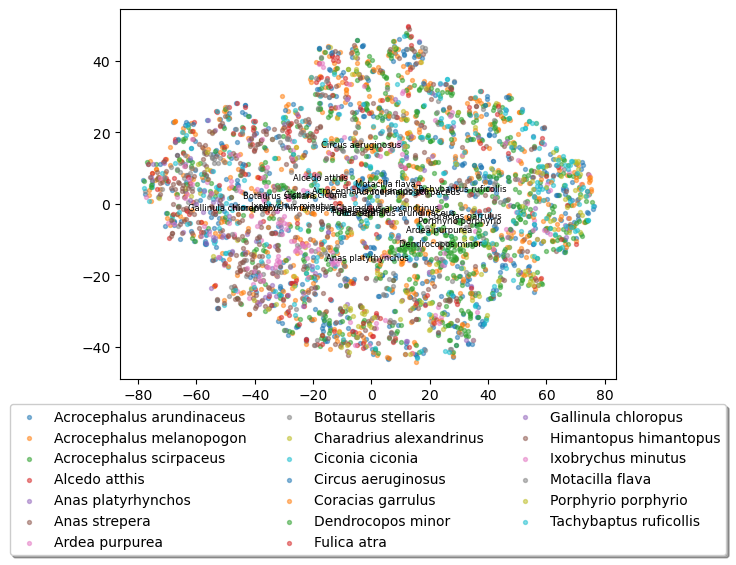

In [19]:

# Get unique labels
# caller
# total_cID = np.array(total_cID)
# used_label = np.expand_dims(total_cID, axis=0)

# caller_class
total_ctID = np.array(total_ctID)
caller_type_label = np.expand_dims(total_ctID, axis=0)
# ------------------------------------------------------------------------
# use data segment
# ran_data = True
ran_data = False
if ran_data:
    num_samples = 5000
    random.seed(0)
    rand = list(range(len(data_2d_con)))
    samples = random.sample(rand, num_samples)
    data_2d_con_seg = data_2d_con[samples,]
    # used_label_seg = used_label[:,samples]
    # unique_labels = np.unique(used_label_seg)
else:
    # not random choose data segment
    data_2d_con_seg = data_2d_con
    # used_label_seg = used_label
    # unique_labels = np.unique(used_label_seg)
    # print(data_2d_con.shape)
    # print(unique_labels.shape)
    # print(unique_labels)

# select data from data label
# random select
# num_label = 5
# num_label = 71

unique_call_type_label = np.unique(caller_type_label)

for label in unique_call_type_label:
    label_mask = np.all(caller_type_label == label, axis=0)
    
    # print('label',label)
    # print(label_mask)
    # Select data for this label
    data_for_label = data_2d_con_seg[label_mask]
    
    # Plot the data for this label with a label for the legend
    plt.scatter(data_for_label[:, 0], data_for_label[:, 1], label=label, alpha=0.5, s=8)

    # center prosition
    centroid = np.median(data_for_label, axis=0)
    # text label
    plt.text(centroid[0], centroid[1], str(label), fontsize=6, color='black', ha='center', va='center')

# Add a legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=3)
plt.show()

In [20]:
from sklearn.manifold import TSNE

# total_z_con = 
# caller
total_z_indi = np.array(total_z_indi).squeeze() # indi
total_z_indi_mu = np.array(total_z_indi_mu).squeeze() # individual miu
total_z_indi_log_std = np.array(total_z_indi_log_std).squeeze()
total_indi = np.hstack((total_z_indi_mu, total_z_indi_log_std))

# tsne
tsne = TSNE(n_components=2, perplexity = 30, n_iter = 1000)
data_2d_speaker = tsne.fit_transform(total_z_indi_mu)



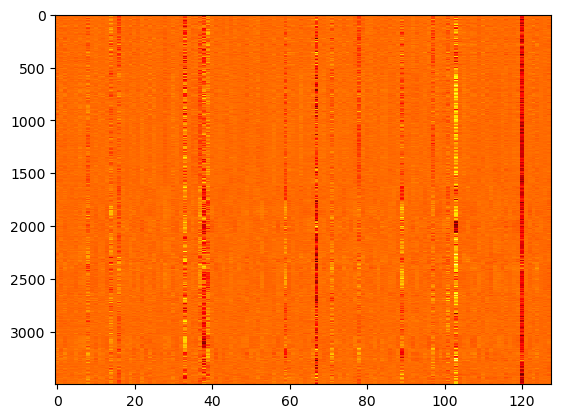

In [21]:
plt.imshow(total_z_indi_mu, aspect='auto', cmap='hot', interpolation='nearest')
plt.show()

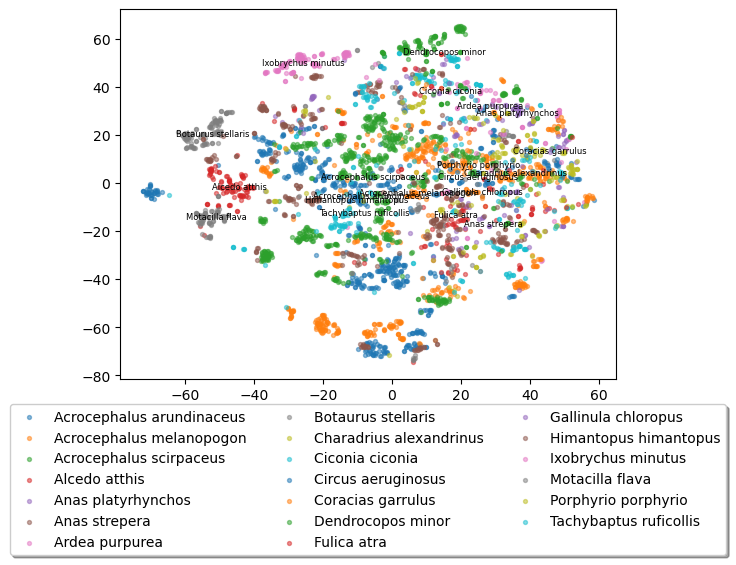

In [22]:
# Get unique labels
# caller_class
total_ctID = np.array(total_ctID)
caller_type_label = np.expand_dims(total_ctID, axis=0)


for label in unique_call_type_label:
    label_mask = np.all(caller_type_label == label, axis=0)
    
    # print('label',label)
    # print(label_mask)
    # Select data for this label
    data_for_label = data_2d_speaker[label_mask]
    
    # Plot the data for this label with a label for the legend
    plt.scatter(data_for_label[:, 0], data_for_label[:, 1], label=label, alpha=0.5, s=8)

    # center prosition
    centroid = np.median(data_for_label, axis=0)
    # text label
    plt.text(centroid[0], centroid[1], str(label), fontsize=6, color='black', ha='center', va='center')

# Add a legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=3)
plt.show()



In [11]:
import pandas as pd

em_save = True
if em_save:
    ## save
    embed_save_path = os.path.join(model_path, exp_name, 'embedding')

    if not os.path.exists(embed_save_path):
        os.makedirs(embed_save_path)
        
    # data
    print(total_z_indi_mu.shape)
    save_df = pd.DataFrame(total_z_indi_mu)
    save_df.to_csv(os.path.join(model_path, exp_name, 'embedding', 'embedding.csv'), index=False, header=False)

    # caller label save
    caller_df = pd.DataFrame(total_cID)
    caller_df.to_csv(os.path.join(model_path, exp_name, 'embedding', 'caller_label.csv'), index=False, header=False)
    
    # caller type label save
    caller_type_df = pd.DataFrame(total_ctID) 
    caller_type_df.to_csv(os.path.join(model_path, exp_name, 'embedding', 'caller_type_label.csv'), index=False, header=False)



(3498, 128)


In [26]:
total_ctID

array(['W67_0', 'W67_0', 'W67_0', ..., 'O113_3', 'O113_3', 'O113_3'],
      dtype='<U7')

key_indi_mu (3498, 14)
key_posi_total (3498, 14)


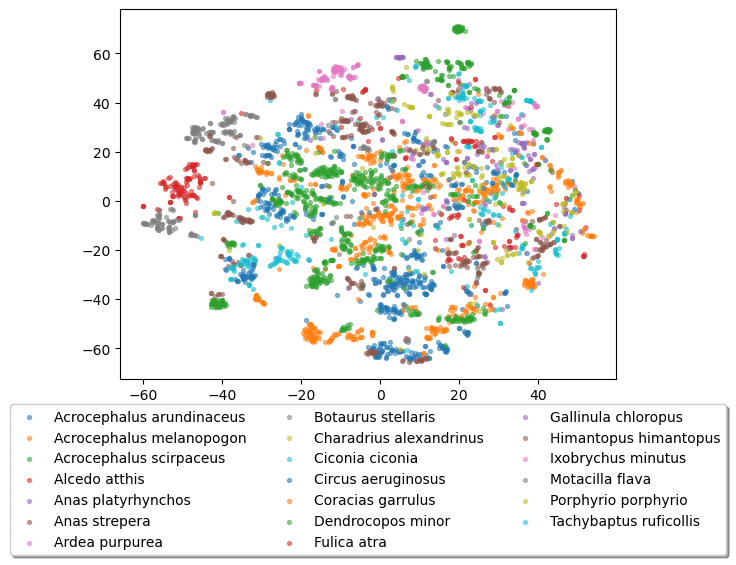

In [20]:
# test key posti of indi miu
from sklearn.manifold import TSNE

# call type
key_indi_mu = np.array(total_key_indi_mu).squeeze()

print('key_indi_mu',key_indi_mu.shape)

# choose some caller vector
# key_indi_mu = key_indi_mu[:,:]
# indics = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
# key_indi_mu = key_indi_mu[:,0]

# tsne
tsne = TSNE(n_components = 2, perplexity = 35, n_iter = 1000)
key_posi_total = tsne.fit_transform(key_indi_mu)

print('key_posi_total',key_indi_mu.shape)


key_used_label = np.expand_dims(total_ctID, axis=0)
key_unique_labels = np.unique(key_used_label)
for label in key_unique_labels:
    # 这里我们不需要指定axis，因为used_label只有一行
    label_mask = np.all(key_used_label == label, axis=0)
    # Select data for this label
    data_for_label = key_posi_total[label_mask]
    # Plot the data for this label with a label for the legend
    plt.scatter(data_for_label[:, 0], data_for_label[:, 1], label=label, alpha=0.5, s=8)

# Add a legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=3)
plt.show()
    

In [29]:
key_indi_mu.shape

(9154, 17)

In [30]:
import pandas as pd

em_save = True
if em_save:
    ## save
    embed_save_path = os.path.join(model_path, exp_name, 'embedding_short')

    if not os.path.exists(embed_save_path):
        os.makedirs(embed_save_path)
        
    # data
    print(key_indi_mu.shape)
    save_df = pd.DataFrame(key_indi_mu)
    save_df.to_csv(os.path.join(model_path, exp_name, 'embedding_short', 'embedding.csv'), index=False, header=False)

    # caller label save
    caller_df = pd.DataFrame(total_cID)
    caller_df.to_csv(os.path.join(model_path, exp_name, 'embedding_short', 'caller_label.csv'), index=False, header=False)
    
    # caller type label save
    caller_type_df = pd.DataFrame(total_ctID) 
    caller_type_df.to_csv(os.path.join(model_path, exp_name, 'embedding_short', 'caller_type_label.csv'), index=False, header=False)



(9154, 17)


In [10]:


# ------------------------------------------------------------------------
# config loading
data_config_path = "./Animal/configs/greatbird/dataset_greatbird_chunk.yaml"

# dataset vctk
dataset_config = yaml.load(open(data_config_path, "r"), Loader=yaml.FullLoader)
analy_set = greatbirdDataset(dataset_config, subset='test')
# analy_set = greatbirdDataset(dataset_config, subset='train')

analy_loader = DataLoader(analy_set, batch_size=1, shuffle=False)


# device
torch.cuda.set_device(1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



dataset greatbird loading...


100%|██████████| 9154/9154 [00:13<00:00, 690.31it/s] 


In [1]:
# input to model
#%%
import os
import sys
import json
from argparse import ArgumentParser
import yaml
import torch
import random
import numpy as np
from tqdm import tqdm
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from matplotlib import pyplot as plt
# personal files
import models
from datasets import MelDataset, vctkDataset, greatbirdDataset, finchbird2, western_bird
from matplotlib.pyplot import ylim
import torch.distributions as D
from itertools import islice


os.chdir('/mnt/work/')
# config loading
data_config_path = "./Animal/configs/western_bird/dataset_western_bird_chunk.yaml"
dataset_config = yaml.load(open(data_config_path, "r"), Loader=yaml.FullLoader)
analy_set = western_bird(dataset_config, subset='test')
analy_loader = DataLoader(analy_set, batch_size=1, shuffle=False)




dataset winterbird loading...


100%|██████████| 3498/3498 [01:08<00:00, 50.97it/s]


cID_type: Acrocephalus melanopogon


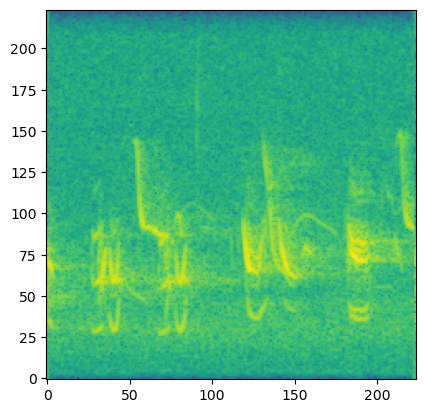

(1, 128)
reconstructed: Acrocephalus melanopogon


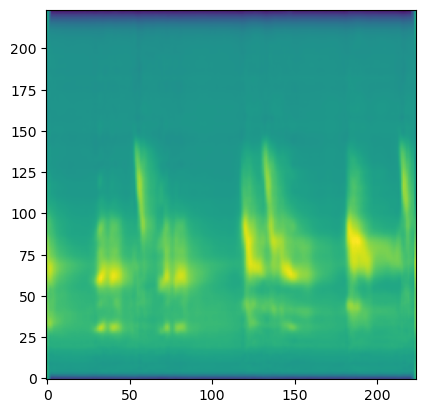

(1, 128)
-0.051306535
[-3.0, -2.6, -2.2, -1.8000000000000003, -1.4000000000000004, -1.0000000000000004, -0.6000000000000005, -0.20000000000000062, 0.1999999999999993, 0.5999999999999992, 0.9999999999999991, 1.3999999999999986, 1.799999999999999, 2.1999999999999993, 2.5999999999999988]
z_sta -3.0
z_dy torch.Size([1, 128, 224]) z_sta torch.Size([1, 128])
shape torch.Size([1, 128, 224]) torch.Size([1, 128])


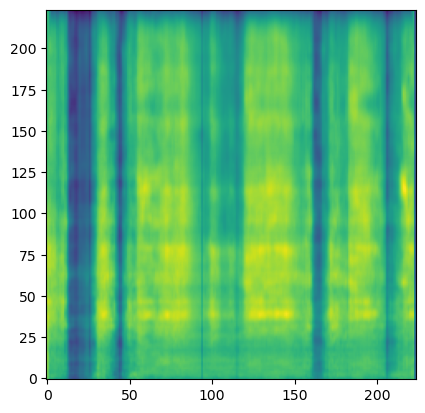

z_sta -2.6
z_dy torch.Size([1, 128, 224]) z_sta torch.Size([1, 128])
shape torch.Size([1, 128, 224]) torch.Size([1, 128])


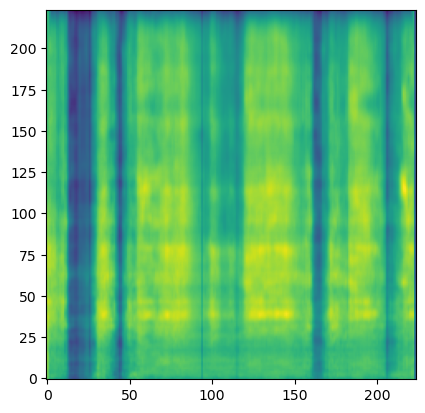

z_sta -2.2
z_dy torch.Size([1, 128, 224]) z_sta torch.Size([1, 128])
shape torch.Size([1, 128, 224]) torch.Size([1, 128])


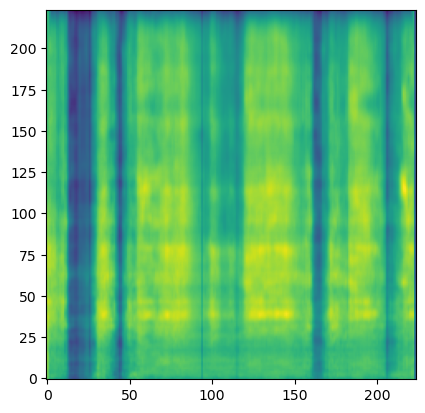

z_sta -1.8000000000000003
z_dy torch.Size([1, 128, 224]) z_sta torch.Size([1, 128])
shape torch.Size([1, 128, 224]) torch.Size([1, 128])


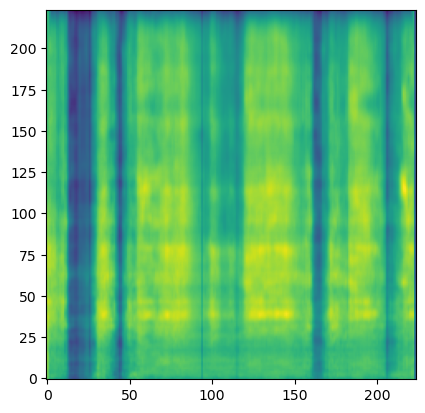

z_sta -1.4000000000000004
z_dy torch.Size([1, 128, 224]) z_sta torch.Size([1, 128])
shape torch.Size([1, 128, 224]) torch.Size([1, 128])


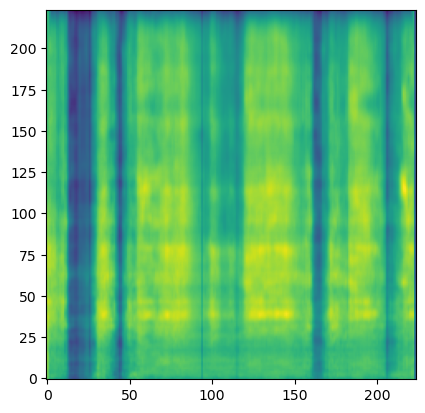

z_sta -1.0000000000000004
z_dy torch.Size([1, 128, 224]) z_sta torch.Size([1, 128])
shape torch.Size([1, 128, 224]) torch.Size([1, 128])


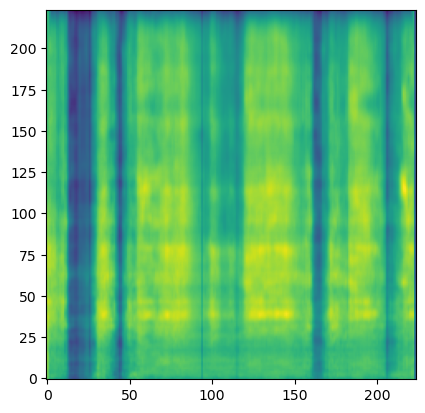

z_sta -0.6000000000000005
z_dy torch.Size([1, 128, 224]) z_sta torch.Size([1, 128])
shape torch.Size([1, 128, 224]) torch.Size([1, 128])


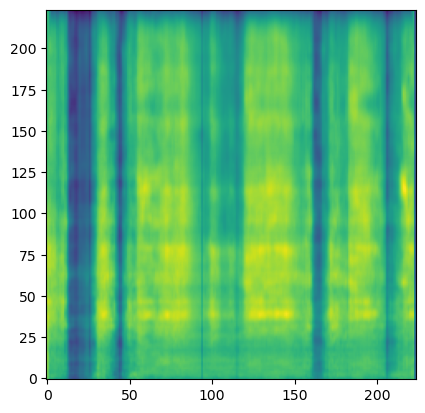

z_sta -0.20000000000000062
z_dy torch.Size([1, 128, 224]) z_sta torch.Size([1, 128])
shape torch.Size([1, 128, 224]) torch.Size([1, 128])


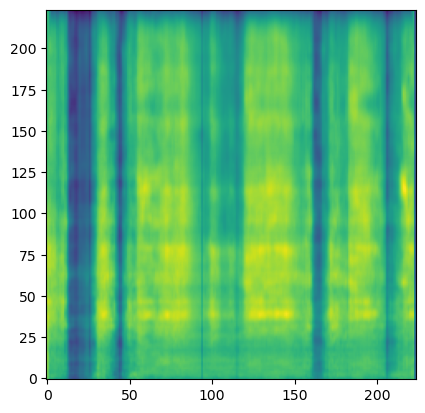

z_sta 0.1999999999999993
z_dy torch.Size([1, 128, 224]) z_sta torch.Size([1, 128])
shape torch.Size([1, 128, 224]) torch.Size([1, 128])


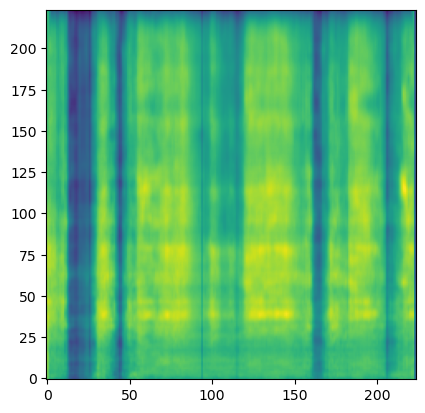

z_sta 0.5999999999999992
z_dy torch.Size([1, 128, 224]) z_sta torch.Size([1, 128])
shape torch.Size([1, 128, 224]) torch.Size([1, 128])


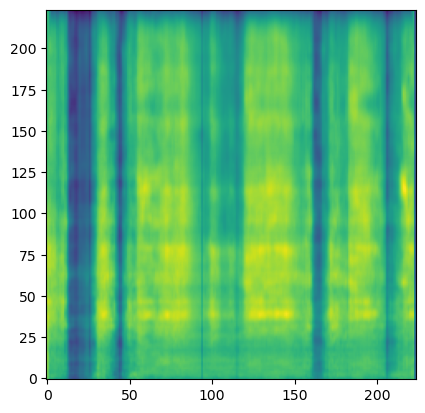

z_sta 0.9999999999999991
z_dy torch.Size([1, 128, 224]) z_sta torch.Size([1, 128])
shape torch.Size([1, 128, 224]) torch.Size([1, 128])


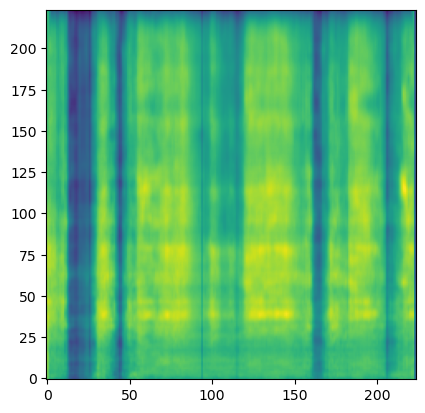

z_sta 1.3999999999999986
z_dy torch.Size([1, 128, 224]) z_sta torch.Size([1, 128])
shape torch.Size([1, 128, 224]) torch.Size([1, 128])


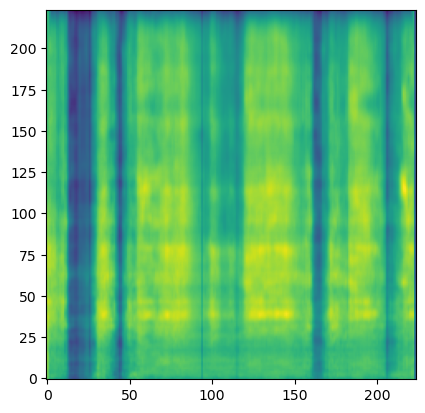

z_sta 1.799999999999999
z_dy torch.Size([1, 128, 224]) z_sta torch.Size([1, 128])
shape torch.Size([1, 128, 224]) torch.Size([1, 128])


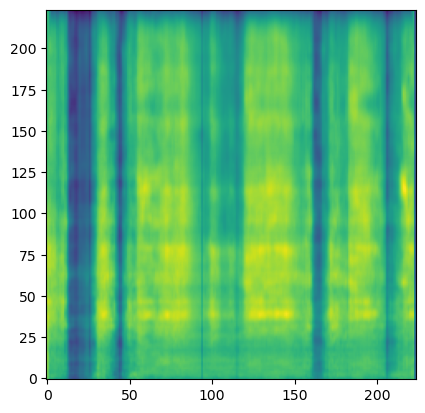

z_sta 2.1999999999999993
z_dy torch.Size([1, 128, 224]) z_sta torch.Size([1, 128])
shape torch.Size([1, 128, 224]) torch.Size([1, 128])


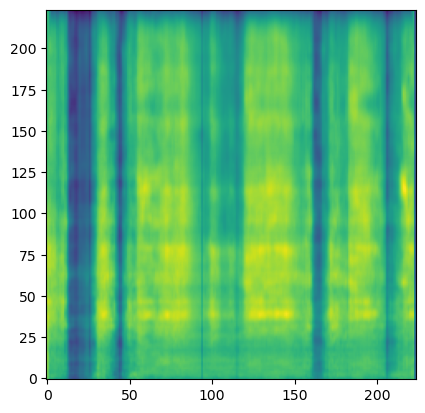

z_sta 2.5999999999999988
z_dy torch.Size([1, 128, 224]) z_sta torch.Size([1, 128])
shape torch.Size([1, 128, 224]) torch.Size([1, 128])


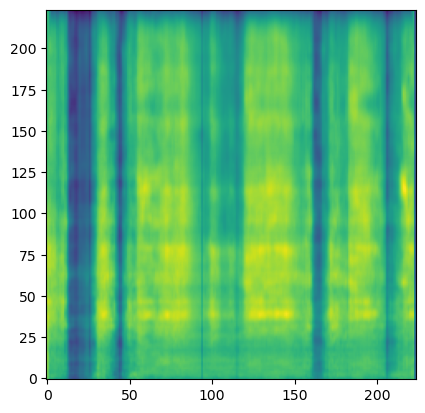

indi kl tensor(99.8755, device='cuda:1', grad_fn=<MeanBackward0>)


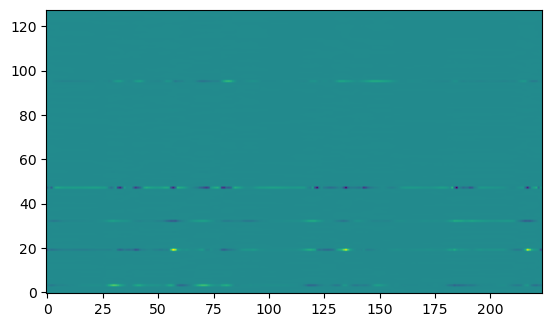

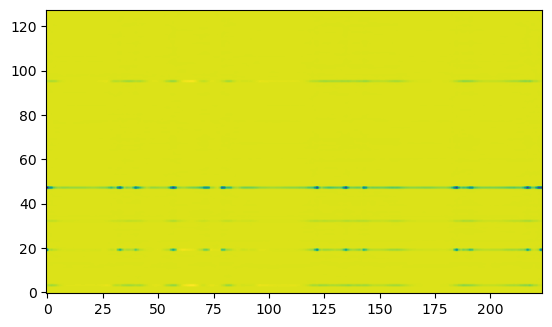

dy_kl tensor(1.2416, device='cuda:1', grad_fn=<MeanBackward0>)


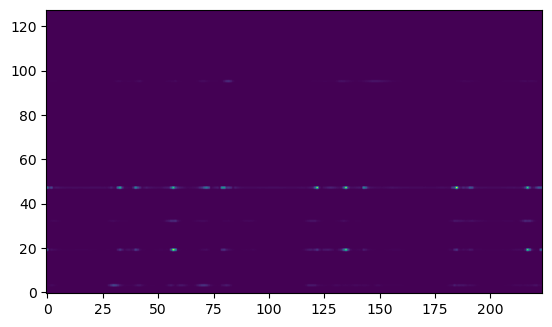

kl_dy_sumtime torch.Size([1, 224])
sorted_indices [120, 103, 67, 38, 33, 89, 37, 39, 59, 71, 78, 14, 16, 97, 101, 8, 76, 27, 86, 13, 113, 40, 19, 70, 81, 30, 23, 102, 21, 50, 47, 93, 122, 123, 6, 79, 49, 45, 84, 63, 121, 11, 46, 48, 125, 26, 43, 99, 65, 112, 75, 56, 53, 111, 24, 74, 92, 12, 2, 114, 100, 1, 82, 7, 58, 25, 87, 90, 44, 5, 32, 118, 22, 36, 117, 124, 98, 17, 42, 28, 126, 115, 55, 106, 60, 107, 95, 15, 51, 105, 35, 85, 83, 109, 64, 20, 54, 119, 34, 104, 41, 69, 9, 10, 66, 72, 77, 80, 29, 4, 94, 116, 18, 62, 91, 61, 73, 68, 52, 3, 96, 88, 108, 127, 57, 110, 31, 0]
sorted indi_mu [array([-1.9188629], dtype=float32), array([1.1932001], dtype=float32), array([-0.73616785], dtype=float32), array([-0.9894618], dtype=float32), array([-0.5186989], dtype=float32), array([-0.44882575], dtype=float32), array([-0.5169005], dtype=float32), array([0.33598444], dtype=float32), array([-0.22831546], dtype=float32), array([-1.0008014], dtype=float32), array([-0.6955402], dtype=float32), array

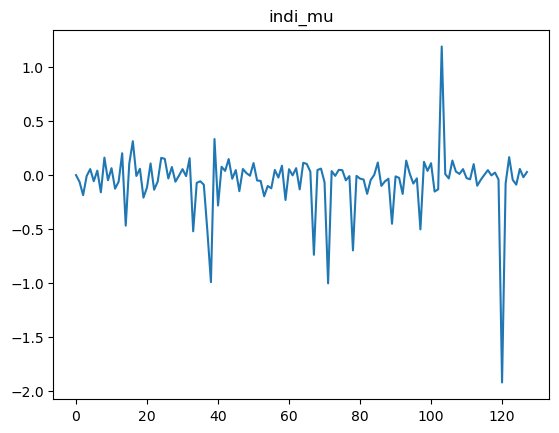

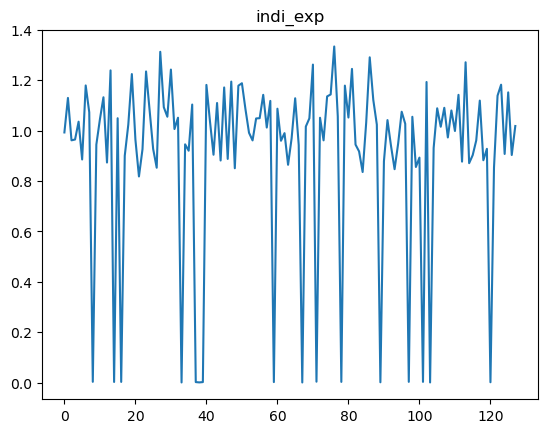

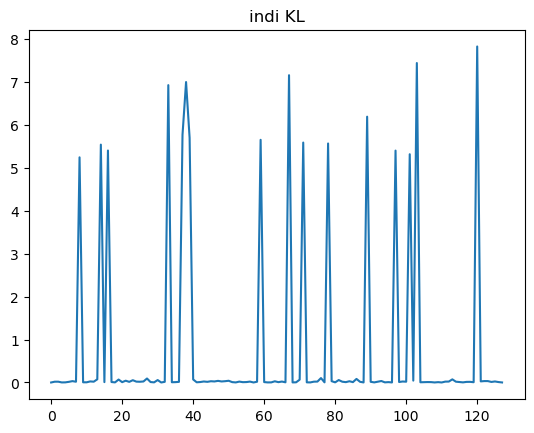

8 [0.1639949] [0.00324842] [5.2430377]
14 [-0.46601537] [0.00265756] [5.5389366]
16 [0.3157925] [0.00287395] [5.401936]
33 [-0.5186989] [0.00068229] [6.924577]
37 [-0.5169005] [0.00216588] [5.7685237]
38 [-0.9894618] [0.00090527] [6.9967966]
39 [0.33598444] [0.00215452] [5.6966324]
59 [-0.22831546] [0.0021874] [5.651109]
67 [-0.73616785] [0.00062055] [7.155874]
71 [-1.0008014] [0.00374915] [5.5870347]
78 [-0.6955402] [0.00295603] [5.5657997]
89 [-0.44882575] [0.00137516] [6.1899085]
97 [-0.5008927] [0.00310582] [5.3999295]
101 [-0.15045168] [0.0030157] [5.315247]
103 [1.1932001] [0.00072651] [7.4391155]
120 [-1.9188629] [0.00152817] [7.8247013]
[8, 14, 16, 33, 37, 38, 39, 59, 67, 71, 78, 89, 97, 101, 103, 120]


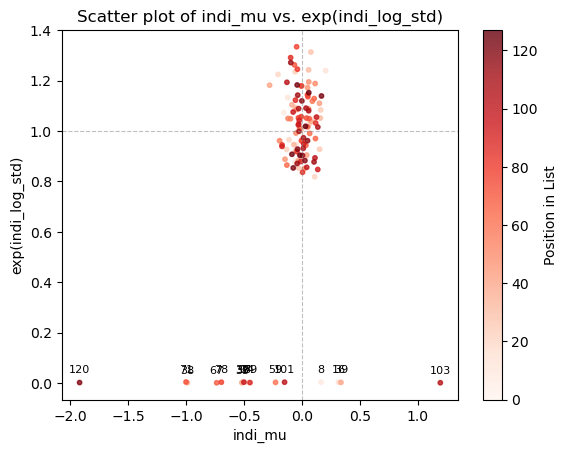

In [4]:

# device
torch.cuda.set_device(1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#------------------------------------------------------------------------
# # model path
# model_config_path = "./Animal/configs/western_bird/model_western_bird.yaml"
# model_path = './Animal/output/western_bird'
# # model name
# #------------------------------------------------------------------------
# ## embedding yes
# exp_name = 'VAEbase-western_bird_2-c_100.0_1.0-i_10.0_100.0'
# checkpoint = "190000.pth.tar"
# key_posi = [10, 18, 22, 23, 24, 29, 34, 41, 44, 56, 57, 61, 63, 85, 87, 90, 92, 96, 116, 118, 121, 122, 127]
#------------------------------------------------------------------------
# model path
model_config_path = "./Animal/configs/western_bird/model_western_bird.yaml"
model_path = './Animal/output/western_bird'
# model name
## embedding yes
exp_name = 'VAEbase-western_bird_3-c_100.0_0.75-i_10.0_100.0'
checkpoint = "240000.pth.tar"




# model loading
model_config = yaml.load(open(model_config_path, "r"), Loader=yaml.FullLoader)
model_name = model_config['model_name']
model_type = getattr(models, model_name) # model choose
model = model_type(model_config, device).to(device) # model config load


#load model
save_path = os.path.join(model_path, exp_name, 'checkpoint', checkpoint)
ckpt = torch.load(save_path)
model.load_state_dict(ckpt["model"])
model.eval()
#--------------------------------------------------------------------------------

# Skip 'n' batches and then get the next one
mel, lenx, indi_mel, cID, cID_type = next(islice(analy_loader, 1008, None))

# 1490


# plot sepc
print('cID_type:',cID_type[0])
plt.imshow(mel[0], origin = 'lower')
plt.show()

# print('cID_type:',cID_type[0])
# plt.imshow(indi_mel[0], origin = 'lower')
# plt.show()

# test input model
mel = mel.to(device)
lenx = lenx.to(device)
indi_mel = indi_mel.to(device)

#--------------------------------------------------------------------------------
# random input
# indi_mel = torch.normal(mean = 1, std = 1, size=(1, 80, 256)).to(device)

# output of trained model
outputs = model(mel, lenx, indi_mel) 
z_indi_mu = outputs['indi_mu'].detach().cpu().numpy()
z_indi_log_std = outputs['indi_log_std'].detach().cpu().numpy()
z_indi = outputs['z_indi'].detach().cpu().numpy() 
z_con_mu = outputs['con_mu'].detach().cpu().numpy() 
z_con_log_std = outputs['con_log_std'].detach().cpu().numpy() 
z_con = outputs['z_con'].detach().cpu().numpy() 
x_rec = outputs['x_rec'].detach().cpu().numpy() 

# plot recon
print(z_indi_mu.shape)
print('reconstructed:',cID_type[0])
plt.imshow(x_rec[0], origin = 'lower')
plt.show()

# miu & sigma
print(z_indi_mu.shape)
print(np.mean(z_indi_mu))
#--------------------------------------------------------------------------------
# step load encoders
dy_mu, dy_std= model.dynamicEncoder(mel, lenx)
sta_mu, sta_log_std = model.staticEncoder(indi_mel)

# sample
z_dy = model.dynamicEncoder.sample(dy_mu, dy_std)
z_sta = model.staticEncoder.sample(sta_mu, sta_log_std)

# 修改z value
# z_sta = torch.zeros_like(z_sta)
value = [i for i in np.arange(-3, 3, 0.4)]
print(value)
for i in value:
    z_sta[:, 8] = i 
    print('z_sta',i)
    print('z_dy',z_dy.shape,'z_sta',z_sta.shape)
    # zero
    # z_dy = torch.zeros_like(z_dy)
    z_sta = torch.zeros_like(z_sta)

    time_len = z_dy.size(2)
    z_sta_in = z_sta.unsqueeze(2).expand(-1, -1, time_len)

    dec_in = torch.cat([z_sta_in, z_dy], dim=1)
    x_rec = model.decoder(dec_in, lenx)

    print('shape',dy_mu.shape, sta_mu.shape)
    
    
    plt.imshow(x_rec[0].detach().cpu().numpy() , origin = 'lower')
    plt.show()
#--------------------------------------------------------------------------------
# indi KL
# formula
indi_kl = model.staticEncoder.kl_divergence(outputs['indi_mu'], outputs['indi_log_std'])
print('indi kl', indi_kl)
# step by step for KL
post = D.Normal(outputs['indi_mu'], torch.exp(outputs['indi_log_std']))
prior = D.Normal(
    torch.zeros_like(outputs['indi_mu'], requires_grad=False),
    torch.ones_like(torch.exp(outputs['indi_log_std']), requires_grad=False))
kl_indi = D.kl.kl_divergence(post, prior)
#--------------------------------------------------------------------------------
# dynamic KL
def sequence_mask(length, max_length=None):
    if max_length is None:
        max_length = length.max()
    x = torch.arange(max_length, dtype=length.dtype, device=length.device)
    return x.unsqueeze(0) < length.unsqueeze(1)

#--------------------------------------------------------------------------------
# plot mu std
# con_mu
plt.imshow(outputs['con_mu'][0].detach().cpu().numpy(), origin = 'lower')
plt.show()

# con_log_std
plt.imshow(outputs['con_log_std'][0].detach().cpu().numpy(), origin = 'lower' )
plt.show()

dy_kl = model.dynamicEncoder.kl_divergence(outputs['con_mu'], outputs['con_log_std'], lenx)
print('dy_kl',dy_kl)
#--------------------------------------------------------------------------------
# step by step for KL
mask = sequence_mask(lenx).to(outputs['con_mu'].dtype) # [batch, T] (all 1)
post_dy = D.Normal(outputs['con_mu'], torch.exp(outputs['con_log_std'])) # [batch, dim, T]
prior_dy = D.Normal(
    torch.zeros_like(outputs['con_mu'], requires_grad=False),
    torch.ones_like(outputs['con_log_std'], requires_grad=False)) # [batch, dim, T]
kl_dy = D.kl.kl_divergence(post_dy, prior_dy) # [batch, dim, T]
#--------------------------------------------------------------------------------
# plot kl matrix
plt.imshow(kl_dy[0].detach().cpu().numpy(), origin = 'lower')
plt.show()
#--------------------------------------------------------------------------------
kl_dy_sumtime = torch.sum(kl_dy, dim=1) * mask # [batch, T]


print('kl_dy_sumtime',kl_dy_sumtime.shape)

# dim 1 sum，*mask，dim 1 sum，divided by sum of mask
kl_dy = torch.sum(torch.sum(kl_dy, dim=1) * mask, dim=1) / torch.sum(mask, dim=1) # [batch, dim, T] -> [batch, T], /(sum(mask)), [batch, T] -> [batch]
kl_dy = torch.mean(kl_dy) # [batch] -> [1]

#--------------------------------------------------------------------------------
# plot miu & sigma
kl_indi = kl_indi.detach().cpu().numpy().T
indi_mu = outputs['indi_mu'].detach().cpu().numpy().T
indi_exp = torch.exp(outputs['indi_log_std']).detach().cpu().numpy().T

#--------------------------------------------------------------------------------
# 排序miu std unit的kl散度值
# print(kl[0])
sorted_indices = sorted(range(len(kl_indi)), key=lambda i: kl_indi[i], reverse=True)
print('sorted_indices',sorted_indices)
# print('sorted kl',[kl[i] for i in sorted_indices])
print('sorted indi_mu',[indi_mu[i] for i in sorted_indices])
print('sorted indi_exp',[indi_exp[i] for i in sorted_indices])

# print('kl value',kl)
print('kl shape', kl_indi.shape)
print('kl mean',kl_indi.mean())
print('kl sum',kl_indi.sum())
# kl = torch.mean(torch.sum(kl, dim=1))
#--------------------------------------------------------------------------------
plt.plot(indi_mu)
plt.title('indi_mu')
plt.show()

plt.plot(indi_exp)
plt.title('indi_exp')
plt.show()

plt.plot(kl_indi)
plt.title('indi KL')
plt.show()
#--------------------------------------------------------------------------------
# scatter plot
indices = np.arange(indi_mu.shape[0])
plt.scatter(indi_mu, indi_exp, s=10, c=indices, cmap='Reds', alpha=0.8)
plt.colorbar(label='Position in List')
plt.axhline(1, color='grey', linestyle='--', alpha=0.5, linewidth=0.8)
plt.axvline(0, color='grey', linestyle='--', alpha=0.5, linewidth=0.8)

key_index = []
for i, (x, y) in enumerate(zip(indi_mu, indi_exp)):
    if y < 0.2:
        key_index.append(i)
        print(i,x,y,kl_indi[i])
        plt.text(x, y + 0.03, f'{i}', fontsize=8, ha='center', va='bottom')

print(key_index)

plt.title('Scatter plot of indi_mu vs. exp(indi_log_std)')
plt.xlabel('indi_mu')
plt.ylabel('exp(indi_log_std)')
plt.show()

# print(outputs['indi_mu'])
# print(torch.exp(outputs['indi_log_std']))
# print(torch.zeros_like(outputs['indi_mu'], requires_grad=False))
# print(prior)


(9154, 128)


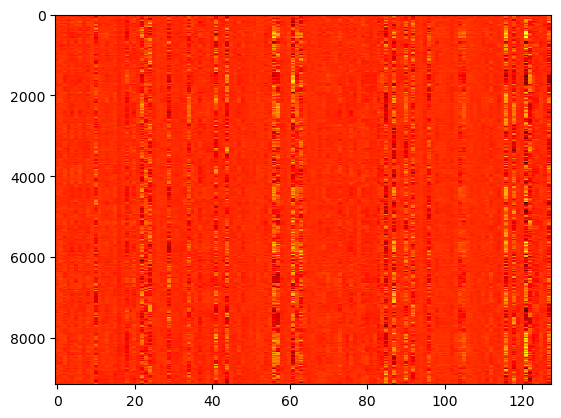

23


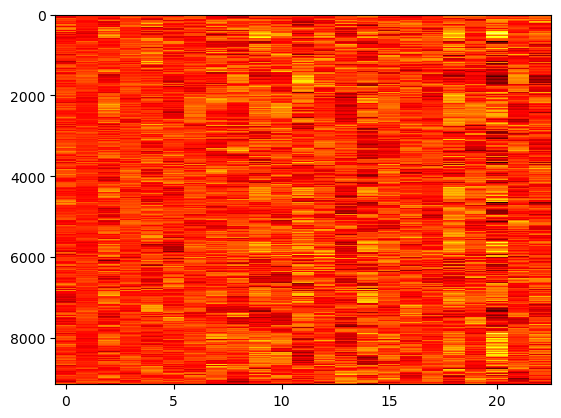

unique_caller_type 5
B101_0 (4, 23)
B101_1 (11, 23)
B101_3 (1, 23)
B101_4 (1, 23)
B101_5 (3, 23)
unique_caller_type 2
B165_0 (1, 23)
B165_1 (7, 23)
unique_caller_type 4
B221_0 (18, 23)
B221_1 (7, 23)
B221_2 (28, 23)
B221_3 (4, 23)
unique_caller_type 2
B39_0 (26, 23)
B39_1 (8, 23)
unique_caller_type 6
B4_0 (18, 23)
B4_1 (15, 23)
B4_2 (6, 23)
B4_3 (34, 23)
B4_4 (4, 23)
B4_5 (21, 23)
unique_caller_type 5
B57_0 (3, 23)
B57_1 (42, 23)
B57_2 (12, 23)
B57_3 (1, 23)
B57_4 (1, 23)
unique_caller_type 4
B67_0 (3, 23)
B67_1 (2, 23)
B67_2 (10, 23)
B67_3 (3, 23)
unique_caller_type 2
B98_0 (22, 23)
B98_1 (32, 23)
unique_caller_type 2
C1_0 (5, 23)
C1_3 (2, 23)
unique_caller_type 3
C10_0 (6, 23)
C10_1 (3, 23)
C10_3 (16, 23)
unique_caller_type 4
C108_0 (1, 23)
C108_1 (7, 23)
C108_2 (15, 23)
C108_4 (7, 23)
total caller_miu_sum (39, 23)


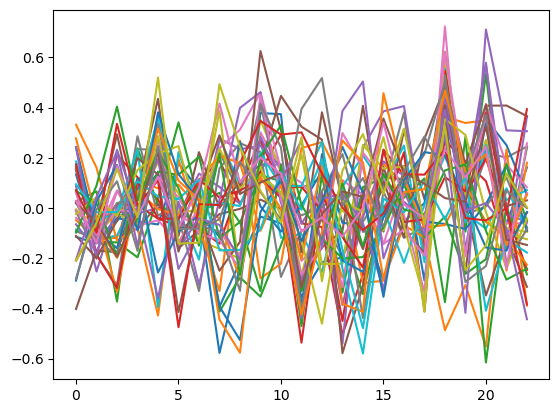

caller_miu_sum (39, 23)


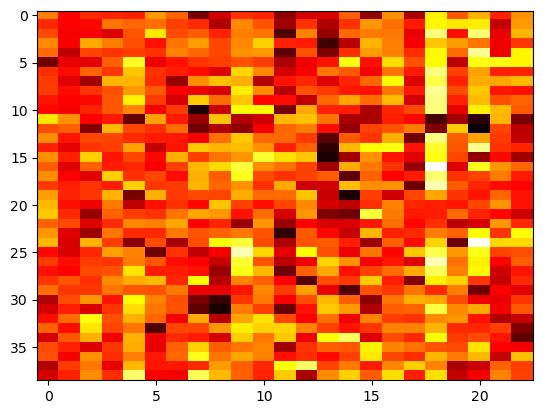

(39, 2)


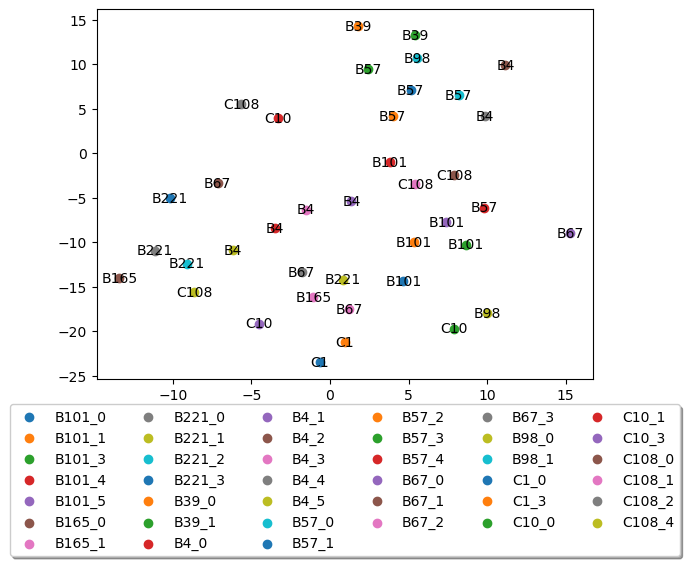

In [ ]:


from logging import handlers


key_posi = [10, 18, 22, 23, 24, 29, 34, 41, 44, 56, 57, 61, 63, 85, 87, 90, 92, 96, 116, 118, 121, 122, 127]

# total_z_indi = np.array(total_z_indi).squeeze() # indi
# total_z_indi_mu = np.array(total_z_indi_mu).squeeze() # individual miu
# total_z_indi_log_std = np.array(total_z_indi_log_std).squeeze()

print(total_z_indi_mu.shape)
total_key_indi_z = [seg[key_posi] for seg in total_z_indi_mu]
total_key_indi_z_sta = [seg[key_posi] for seg in total_z_indi_log_std]


# plot miu std
plt.imshow(total_z_indi_mu, aspect='auto', cmap='hot', interpolation='nearest')
plt.show()
# plt.imshow(total_z_indi_log_std, aspect='auto', cmap='hot', interpolation='nearest')
# plt.show()


# plot key miu std
print(len(total_key_indi_z[0]))
plt.imshow(total_key_indi_z, aspect='auto', cmap='hot', interpolation='nearest')
plt.show()
# plt.imshow(total_key_indi_z_sta, aspect='auto', cmap='hot', interpolation='nearest')
# plt.show()


# for i in range(len(total_key_indi_z)):
#     plt.plot(total_key_indi_z[i])
# plt.show()


# plot spectrogram
# used_caller = ['B101', 'B165', 'B221', 'B39', 'B4s

used_caller = ['B101', 'B165', 'B221', 'B39', 'B4','B57', 'B67', 'B98', 'C1','C10', 'C108']
# ['B101', 'B165', 'B221', 'B39', 'B4','B57', 'B67', 'B98', 'C1' ,'C10', 'C108',
#  'C109' ,'C12', 'C16', 'C4', 'C47', 'C61A' ,'EX10' ,'EX19A' ,'EX29', 'EX34', 'EX51',
#  'EX57', 'EX62', 'EX62E', 'EX62F', 'MP12', 'MP29' ,'MP41', 'MP42' ,'MP50' ,'MP55',
#  'MP57', 'MP61', 'MP64', 'MP65' ,'MP76' ,'MP78' ,'O113' ,'O21', 'O27A' ,'O36', 'O48',
#  'O56', 'O6', 'O75D' ,'O78', 'O82', 'O93', 'P11', 'P6' ,'SW1', 'SW102', 'SW114',
#  'SW128', 'SW19' ,'SW28', 'SW32' ,'SW34', 'SW49' ,'SW60', 'SW9' ,'W103A' ,'W17',
#  'W18' ,'W28', 'W35', 'W36', 'W67' ,'W73' ,'W80']


max_index = 200
caller_miu_sum = []
caller_std_sum = []
total_caller_type = []
for caller in used_caller:
    # caller id
    mask_caller = np.isin(total_cID, caller)
    caller_indices = np.where(mask_caller)[0]
    # print(caller_indices)
    # caller type 
    
    
    unique_caller_type = np.unique(total_ctID[caller_indices])
    
    print('unique_caller_type',len(unique_caller_type))
    for type in unique_caller_type:
        mask_caller_type = np.isin(total_ctID, type)
        caller_type_indices = np.where(mask_caller_type)[0]
        # print('caller_type_indices',caller_type_indices)
        index = 0
        
        caller_type_miu_sum = []
        caller_type_std_sum = []
        
        for i in caller_type_indices:
            # print('{}, num {}'.format(total_ctID[i], index))
            
            caller_type_miu_sum.append(total_key_indi_z[i])
            caller_type_std_sum.append(total_key_indi_z_sta[i])
            
            # plt.imshow(total_x_gt[i][0], origin = 'lower')
            # plt.title('{}, num {}'.format(total_ctID[i], index))  
            # plt.show()
            if index + 1 >= max_index:
                break
            index += 1
        
        
        print(type, np.array(caller_type_miu_sum).shape)
        
        caller_type_miu_sum_mean = np.array(caller_type_miu_sum).mean(axis = 0)
        caller_miu_sum.append(caller_type_miu_sum_mean)
        
        caller_type_std_sum_mean = np.array(caller_type_std_sum).mean(axis = 0)
        caller_std_sum.append(caller_type_std_sum_mean)

        total_caller_type.append(type)
    
    # print(len(caller_std_sum))
# total_caller_type.tolist()
    
print('total caller_miu_sum', np.array(caller_miu_sum).shape)


for i in range(len(caller_miu_sum)):
    plt.plot(caller_miu_sum[i])
plt.show()

# for i in range(len(caller_std_sum)):
#     plt.plot(caller_std_sum[i])
# plt.show()


# 画sum vector图
caller_miu_sum = np.array(caller_miu_sum)
print('caller_miu_sum',caller_miu_sum.shape)

plt.imshow(caller_miu_sum, aspect='auto', cmap='hot', interpolation='nearest')
# plt.legend(handles=total_caller_type)
plt.show()

# plt.imshow(caller_std_sum, aspect='auto', cmap='hot', interpolation='nearest')
# plt.show()


tsne = TSNE(n_components=2, perplexity = 10, n_iter = 1000)
data_2d = tsne.fit_transform(caller_miu_sum)

print(data_2d.shape)

y = total_caller_type


for i in range(len(np.unique(y))):
    # print(y, y[i])
    
    mask_caller = np.isin(y, y[i])
    caller_indices = np.where(mask_caller)[0]
    # print('mask_caller', mask_caller)
    # print('caller_indices', caller_indices)

    # print(caller_indices)
    plt.scatter(data_2d[caller_indices, 0], data_2d[caller_indices, 1], label='{}'.format(y[i]))
    
    # centroid = np.median(data_2d[i,:], axis=0)
    # plt.text(data_2d[caller_indices, 0], data_2d[caller_indices, 1], str(y[i]), fontsize=6, color='black', ha='center', va='center')
    plt.text(data_2d[caller_indices, 0], data_2d[caller_indices, 1], str(y[i].split('_')[0]), fontsize=10, color='black', ha='center', va='center')
    
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=6)
plt.show()
# for label in total_caller_type:
#     # label_mask = np.all(total_caller_type == label, axis=0)
#     # print('label_mask',label_mask)
#     # data_for_label = data_2d[label_mask]
    
#     print(data_2d)
#     # Plot the data for this label with a label for the legend
#     plt.scatter(data_2d[:, 0], data_2d[:, 1], label=label, alpha=0.5, s=8)

    # center prosition
    # centroid = np.median(data_2d, axis=0)
    # text label
    # plt.text(centroid[0], centroid[1], str(label), fontsize=6, color='black', ha='center', va='center')


# Add a legend
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=6)



